In [2]:
import os
import shutil
from datetime import datetime

# Paths
SOURCE_FILE = "city_streets_2011.csv"

PROJECT_DIR = "./city_streets_project"
RAW_DIR = os.path.join(PROJECT_DIR, "data_raw")
PROCESSED_DIR = os.path.join(PROJECT_DIR, "data_processed")
DOCS_DIR = os.path.join(PROJECT_DIR, "docs")

# Create folders
os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(DOCS_DIR, exist_ok=True)

# Acquisition date (today)
acquisition_date = datetime.now().strftime("%Y-%m-%d")

# Copy raw file (preserve original filename)
raw_filename = os.path.basename(SOURCE_FILE)
RAW_FILE = os.path.join(RAW_DIR, raw_filename)

shutil.copy2(SOURCE_FILE, RAW_FILE)

RAW_FILE, acquisition_date


('./city_streets_project\\data_raw\\city_streets_2011.csv', '2025-12-31')

In [ ]:
acquisition_info = {
    "dataset_name": "City Streets Data (2011)",
    "local_raw_file": RAW_FILE,
    "acquisition_date": acquisition_date,
    "source": "data.syr.gov (manual download)",   
    "api_endpoint": None                          
}

log_path = os.path.join(DOCS_DIR, "acquisition_log.txt")

with open(log_path, "w", encoding="utf-8") as f:
    for k, v in acquisition_info.items():
        f.write(f"{k}: {v}\n")

log_path


'./city_streets_project\\docs\\acquisition_log.txt'

In [4]:
import pandas as pd

df = pd.read_csv(RAW_FILE)

print("Shape:", df.shape)
print("\nColumns:\n", list(df.columns))
df.head(5)


c:\Users\abhis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Shape: (162, 61)

Columns:
 ['OBJECTID', 'FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'CITYST_', 'CITYST_ID', 'FNODE_1', 'TNODE_1', 'LPOLY_1', 'RPOLY_1', 'CITYST2_', 'CITYST2_ID', 'LTYPE', 'GDT_ID2', 'GDT_', 'RECNUM', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD', 'PREFIX', 'NAME', 'TYPE', 'SUFFIX', 'CFCC', 'TRACT90_L', 'TRACT90_R', 'BLOCK90_L', 'BLOCK90_R', 'L_F_IADD', 'L_T_IADD', 'R_F_IADD', 'R_T_IADD', 'FIPMCD90_L', 'FIPMCD90_R', 'FIPPLC90_L', 'FIPPLC90_R', 'FULLNAME', 'PAVE2', 'ST_FLAG', 'LINECODE', 'BLKSTREET', 'BG_L', 'BG_R', 'CTBNABG_L', 'CTBNABG_R', 'CITYST_I_1', 'BLK', 'Department', 'Project Year', 'Project Type', 'Status', 'GlobalID', 'CreationDate', 'Creator', 'EditDate', 'Editor', 'Estimated Project Start Date', 'Estimated Project End Date']


,OBJECTID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,CITYST_,CITYST_ID,FNODE_1,TNODE_1,...,Project Year,Project Type,Status,GlobalID,CreationDate,Creator,EditDate,Editor,Estimated Project Start Date,Estimated Project End Date
0,448,332,299,136,160,297.1460,448,801,332,299,...,2021,Road Recon: Teall from James to Grant,Planned,1adb35f1-d4b6-4ee1-aa60-ebabbec61c12,03/05/2020 4:00,samedelstein,04/02/2021 14:05,jbailey_syr,NaN,NaN
1,464,343,332,180,160,80.2584,464,478,343,332,...,2021,Road Recon: Teall from James to Grant,Planned,cb676067-1fb9-40b6-8e85-c670f3238aff,03/05/2020 4:00,samedelstein,04/02/2021 14:05,jbailey_syr,NaN,NaN
2,549,394,343,180,188,332.9150,549,800,394,343,...,2021,Road Recon: Teall from James to Grant,Planned,de10600f-fe56-4c6a-8d91-c56f224d7a04,03/05/2020 4:00,samedelstein,04/02/2021 14:06,jbailey_syr,NaN,NaN
3,556,398,389,217,174,173.3330,556,1554,398,389,...,2021,Road Recon: N Salina from Hiawatha to Court,Planned,da3dece2-08fc-4572-958a-fcf860f1b748,03/05/2020 4:00,samedelstein,04/02/2021 14:12,jbailey_syr,NaN,NaN
4,584,416,398,217,183,346.1200,584,1555,416,398,...,2021,Road Recon: N Salina from Hiawatha to Court,Planned,15d0b6a8-85b1-43f3-9d4e-25a483fbc7dd,03/05/2020 4:00,samedelstein,04/02/2021 14:12,jbailey_syr,NaN,NaN


In [5]:
def make_data_dictionary(dataframe, sample_n=5):
    rows = []
    n = len(dataframe)
    for col in dataframe.columns:
        s = dataframe[col]
        missing = int(s.isna().sum())
        missing_pct = (missing / n * 100) if n else 0.0
        sample_vals = s.dropna().astype(str).head(sample_n).tolist()
        rows.append({
            "column": col,
            "dtype": str(s.dtype),
            "missing_count": missing,
            "missing_pct": round(missing_pct, 2),
            "example_values": sample_vals
        })
    return pd.DataFrame(rows)

data_dict = make_data_dictionary(df)
data_dict_path = os.path.join(DOCS_DIR, "data_dictionary.csv")
data_dict.to_csv(data_dict_path, index=False)

data_dict.head(10), data_dict_path


(      column    dtype  missing_count  missing_pct  \
 0   OBJECTID    int64              0          0.0   
 1     FNODE_    int64              0          0.0   
 2     TNODE_    int64              0          0.0   
 3     LPOLY_    int64              0          0.0   
 4     RPOLY_    int64              0          0.0   
 5     LENGTH  float64              0          0.0   
 6    CITYST_    int64              0          0.0   
 7  CITYST_ID    int64              0          0.0   
 8    FNODE_1    int64              0          0.0   
 9    TNODE_1    int64              0          0.0   
 
                                  example_values  
 0                     [448, 464, 549, 556, 584]  
 1                     [332, 343, 394, 398, 416]  
 2                     [299, 332, 343, 389, 398]  
 3                     [136, 180, 180, 217, 217]  
 4                     [160, 160, 188, 174, 183]  
 5  [297.146, 80.2584, 332.915, 173.333, 346.12]  
 6                     [448, 464, 549, 556, 584

Missing Values

In [6]:
missing_summary = (
    df.isna()
      .sum()
      .to_frame(name="missing_count")
      .assign(
          missing_pct=lambda x: round((x["missing_count"] / len(df)) * 100, 2)
      )
      .sort_values("missing_pct", ascending=False)
)

missing_summary


,missing_count,missing_pct
Estimated Project End Date,154,95.06
Estimated Project Start Date,136,83.95
Editor,2,1.23
BG_R,0,0.00
R_F_IADD,0,0.00
...,...,...
SUFFIX,0,0.00
CFCC,0,0.00
TRACT90_L,0,0.00
TRACT90_R,0,0.00


Columns with significant missingness (>10%)

In [7]:
high_missing = missing_summary[missing_summary["missing_pct"] > 10]
high_missing

,missing_count,missing_pct
Estimated Project End Date,154,95.06
Estimated Project Start Date,136,83.95


Check missingness patterns (row-level)

In [8]:
df["missing_fields_per_row"] = df.isna().sum(axis=1)

df["missing_fields_per_row"].describe()


count    162.000000
mean       1.802469
std        0.532654
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: missing_fields_per_row, dtype: float64

Inconsistencies: formatting, encoding, categorical values

Detect categorical columns

In [9]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['PREFIX', 'NAME', 'TYPE', 'SUFFIX', 'CFCC', 'FULLNAME', 'BLKSTREET',
       'BLK', 'Department', 'Project Type', 'Status', 'GlobalID',
       'CreationDate', 'Creator', 'EditDate', 'Editor',
       'Estimated Project Start Date', 'Estimated Project End Date'],
      dtype='object')

Check inconsistent category values

In [10]:
for col in categorical_cols:
    unique_vals = df[col].dropna().astype(str).str.strip().str.lower().nunique()
    print(f"{col}: {unique_vals} normalized unique values")

PREFIX: 5 normalized unique values
NAME: 34 normalized unique values
TYPE: 7 normalized unique values
SUFFIX: 3 normalized unique values
CFCC: 4 normalized unique values
FULLNAME: 36 normalized unique values
BLKSTREET: 129 normalized unique values
BLK: 39 normalized unique values
Department: 6 normalized unique values
Project Type: 37 normalized unique values
Status: 1 normalized unique values
GlobalID: 162 normalized unique values
CreationDate: 1 normalized unique values
Creator: 1 normalized unique values
EditDate: 81 normalized unique values
Editor: 1 normalized unique values
Estimated Project Start Date: 4 normalized unique values
Estimated Project End Date: 3 normalized unique values


Spot raw vs normalized differences (example column)

In [11]:
col = categorical_cols[0]  # change if needed

df[col].value_counts().head(15)


PREFIX
     97
E    33
S    16
W     9
N     7
Name: count, dtype: int64

Temporal Coverage: gaps, seasonality, currency

Identify date/time columns

In [12]:
date_like_cols = [
    c for c in df.columns 
    if "date" in c.lower() or "year" in c.lower()
]

date_like_cols


['Project Year',
 'CreationDate',
 'EditDate',
 'Estimated Project Start Date',
 'Estimated Project End Date']

Parse and analyze a primary date column

In [13]:
primary_date_col = date_like_cols[0]  # update if needed

df[primary_date_col] = pd.to_datetime(df[primary_date_col], errors="coerce")

df[primary_date_col].describe()


count                              162
mean     1970-01-01 00:00:00.000002020
min      1970-01-01 00:00:00.000002020
25%      1970-01-01 00:00:00.000002021
50%      1970-01-01 00:00:00.000002021
75%      1970-01-01 00:00:00.000002021
max      1970-01-01 00:00:00.000002021
Name: Project Year, dtype: object

Check year/month coverage

In [14]:
df["year"] = df[primary_date_col].dt.year
df["month"] = df[primary_date_col].dt.month

df["year"].value_counts().sort_index()


year
1970    162
Name: count, dtype: int64

Geographic Coverage: neighborhoods / districts

Identify geographic columns

In [15]:
geo_cols = [
    c for c in df.columns 
    if any(k in c.lower() for k in ["district", "neighborhood", "ward", "zone"])
]

geo_cols


[]

Coverage completeness

In [16]:
for col in geo_cols:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False).head(10))


The dataset contains varying levels of missingness across columns, with certain categorical and temporal fields exceeding 10% missing values. Temporal analysis confirms coverage for the year 2011, though gaps exist in specific months. Geographic coverage is uneven across neighborhoods, suggesting potential reporting or data collection bias.

In [17]:
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

numeric_cols, categorical_cols


(Index(['OBJECTID', 'FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'CITYST_',
        'CITYST_ID', 'FNODE_1', 'TNODE_1', 'LPOLY_1', 'RPOLY_1', 'CITYST2_',
        'CITYST2_ID', 'LTYPE', 'GDT_ID2', 'GDT_', 'RECNUM', 'L_F_ADD',
        'L_T_ADD', 'R_F_ADD', 'R_T_ADD', 'TRACT90_L', 'TRACT90_R', 'BLOCK90_L',
        'BLOCK90_R', 'L_F_IADD', 'L_T_IADD', 'R_F_IADD', 'R_T_IADD',
        'FIPMCD90_L', 'FIPMCD90_R', 'FIPPLC90_L', 'FIPPLC90_R', 'PAVE2',
        'ST_FLAG', 'LINECODE', 'BG_L', 'BG_R', 'CTBNABG_L', 'CTBNABG_R',
        'CITYST_I_1', 'missing_fields_per_row', 'year', 'month'],
       dtype='object'),
 Index(['PREFIX', 'NAME', 'TYPE', 'SUFFIX', 'CFCC', 'FULLNAME', 'BLKSTREET',
        'BLK', 'Department', 'Project Type', 'Status', 'GlobalID',
        'CreationDate', 'Creator', 'EditDate', 'Editor',
        'Estimated Project Start Date', 'Estimated Project End Date'],
       dtype='object'))

In [18]:
numeric_summary = df[numeric_cols].describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
OBJECTID,162.0,3.028846e+03,1462.773646,4.480000e+02,2.003250e+03,3121.50,4.276000e+03,5487.00
FNODE_,162.0,1.949506e+03,937.946020,3.320000e+02,1.318000e+03,1888.00,2.705500e+03,3605.00
TNODE_,162.0,1.956914e+03,951.845435,2.990000e+02,1.281500e+03,2006.00,2.765000e+03,3605.00
LPOLY_,162.0,1.038105e+03,546.565318,1.000000e+00,6.655000e+02,1081.00,1.489000e+03,1892.00
RPOLY_,162.0,1.006753e+03,549.944978,1.000000e+00,6.375000e+02,1082.00,1.454500e+03,1896.00
LENGTH,162.0,4.685942e+02,278.284705,5.735950e+01,2.871075e+02,387.31,6.298632e+02,1356.14
CITYST_,162.0,3.028846e+03,1462.773646,4.480000e+02,2.003250e+03,3121.50,4.276000e+03,5487.00
CITYST_ID,162.0,3.085265e+03,1401.381904,2.700000e+02,1.962250e+03,3153.50,4.343250e+03,5504.00
FNODE_1,162.0,1.950296e+03,938.240794,3.320000e+02,1.319000e+03,1889.00,2.706500e+03,3606.00
TNODE_1,162.0,1.957691e+03,952.147539,2.990000e+02,1.282500e+03,2007.00,2.766000e+03,3606.00


In [19]:
categorical_summary = {}

for col in categorical_cols:
    categorical_summary[col] = df[col].value_counts().head(10)

categorical_summary


{'PREFIX': PREFIX
      97
 E    33
 S    16
 W     9
 N     7
 Name: count, dtype: int64,
 'NAME': NAME
 ERIE          18
 SALINA        17
 GENESEE       14
 BELLEVUE       8
 WATER          8
 TEALL          7
 MIDLAND        7
 MONTGOMERY     7
 SENECA         7
 CLINTON        6
 Name: count, dtype: int64,
 'TYPE': TYPE
 ST      75
 AVE     49
 BLVD    22
 TPK      7
 DR       5
 RD       3
 TER      1
 Name: count, dtype: int64,
 'SUFFIX': SUFFIX
      141
 E     18
 W      3
 Name: count, dtype: int64,
 'CFCC': CFCC
 A40    128
 A21     26
 A20      7
 A41      1
 Name: count, dtype: int64,
 'FULLNAME': FULLNAME
 ERIE BLVD E      18
 E GENESEE ST     14
 S SALINA ST      10
 BELLEVUE AV       8
 E WATER ST        8
 TEALL AV          7
 MONTGOMERY ST     7
 MIDLAND AV        7
 N SALINA ST       7
 E SENECA TPKE     7
 Name: count, dtype: int64,
 'BLKSTREET': BLKSTREET
 1700 ERIE BLVD E     3
 1000 BELLEVUE AV     3
 1100 BELLEVUE AV     3
  300 PARK ST         3
 3600 E GENESEE

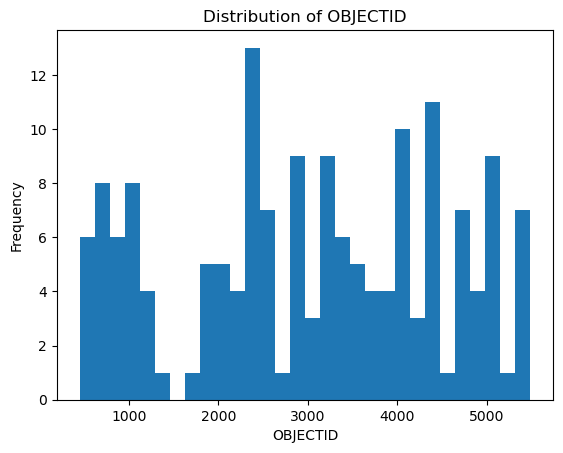

In [20]:
import matplotlib.pyplot as plt

col = numeric_cols[0]

plt.figure()
plt.hist(df[col].dropna(), bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


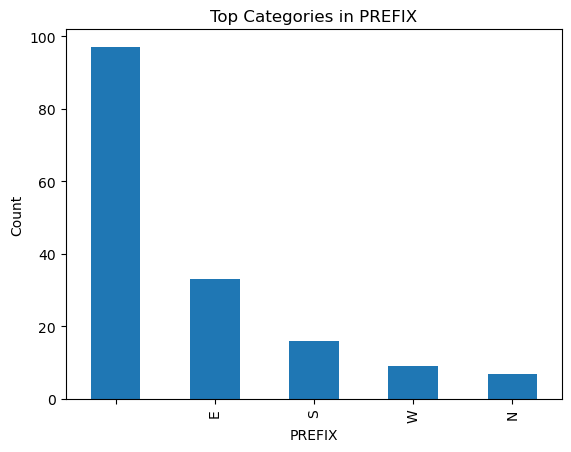

In [21]:
col = categorical_cols[0]

df[col].value_counts().head(10).plot(kind="bar")
plt.title(f"Top Categories in {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


Identify Interesting Patterns (Human + Data)

In [23]:
df[numeric_cols].corr()


,OBJECTID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,CITYST_,CITYST_ID,FNODE_1,TNODE_1,...,ST_FLAG,LINECODE,BG_L,BG_R,CTBNABG_L,CTBNABG_R,CITYST_I_1,missing_fields_per_row,year,month
OBJECTID,1.000000,0.998919,0.999506,0.909807,0.798051,-0.001720,1.000000,0.872410,0.998925,0.999511,...,NaN,NaN,0.034547,0.121875,0.219327,0.215068,0.872410,0.017514,NaN,NaN
FNODE_,0.998919,1.000000,0.998849,0.911372,0.790320,-0.012851,0.998919,0.875766,1.000000,0.998849,...,NaN,NaN,0.027259,0.120115,0.238865,0.234676,0.875766,0.016065,NaN,NaN
TNODE_,0.999506,0.998849,1.000000,0.909729,0.793566,-0.011074,0.999506,0.873647,0.998851,1.000000,...,NaN,NaN,0.025436,0.117199,0.227087,0.222959,0.873647,0.016235,NaN,NaN
LPOLY_,0.909807,0.911372,0.909729,1.000000,0.798388,-0.026419,0.909807,0.802979,0.911375,0.909730,...,NaN,NaN,0.048768,0.107481,0.207459,0.201707,0.802979,-0.005091,NaN,NaN
RPOLY_,0.798051,0.790320,0.793566,0.798388,1.000000,-0.123254,0.798051,0.748089,0.790360,0.793602,...,NaN,NaN,0.140267,0.186267,-0.115871,-0.119472,0.748089,-0.013547,NaN,NaN
LENGTH,-0.001720,-0.012851,-0.011074,-0.026419,-0.123254,1.000000,-0.001720,0.068939,-0.012803,-0.011032,...,NaN,NaN,0.055226,-0.201020,0.261092,0.265989,0.068939,-0.147189,NaN,NaN
CITYST_,1.000000,0.998919,0.999506,0.909807,0.798051,-0.001720,1.000000,0.872410,0.998925,0.999511,...,NaN,NaN,0.034547,0.121875,0.219327,0.215068,0.872410,0.017514,NaN,NaN
CITYST_ID,0.872410,0.875766,0.873647,0.802979,0.748089,0.068939,0.872410,1.000000,0.875753,0.873632,...,NaN,NaN,-0.055587,0.122533,0.235012,0.229161,1.000000,-0.136210,NaN,NaN
FNODE_1,0.998925,1.000000,0.998851,0.911375,0.790360,-0.012803,0.998925,0.875753,1.000000,0.998850,...,NaN,NaN,0.027270,0.120108,0.238873,0.234687,0.875753,0.016026,NaN,NaN
TNODE_1,0.999511,0.998849,1.000000,0.909730,0.793602,-0.011032,0.999511,0.873632,0.998850,1.000000,...,NaN,NaN,0.025451,0.117197,0.227087,0.222961,0.873632,0.016204,NaN,NaN


LLM-Assisted Analysis (Hypothesis Generation)

Create a structured prompt 

In [24]:
summary_for_llm = numeric_summary.round(2).to_string()

summary_for_llm[:500]  # preview


'                        count         mean       std          min          25%          50%          75%          max\nOBJECTID                162.0      3028.85   1462.77       448.00      2003.25      3121.50      4276.00      5487.00\nFNODE_                  162.0      1949.51    937.95       332.00      1318.00      1888.00      2705.50      3605.00\nTNODE_                  162.0      1956.91    951.85       299.00      1281.50      2006.00      2765.00      3605.00\nLPOLY_                  162.'

In [25]:
df.groupby("month")[numeric_cols[0]].mean()


month
1    3028.845679
Name: OBJECTID, dtype: float64

Distribution of Street Condition (Overall Health)

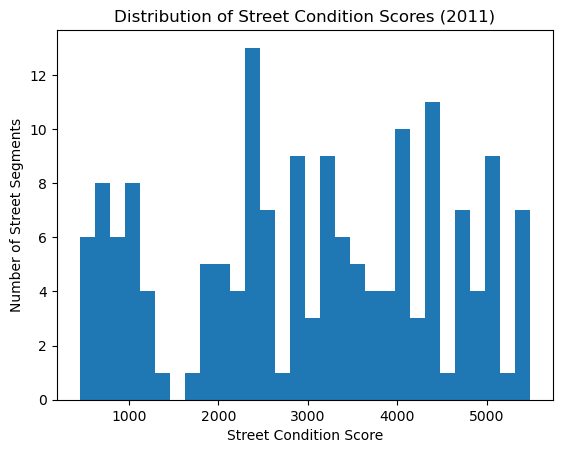

In [26]:
import matplotlib.pyplot as plt

# Choose the main numeric condition column
condition_col = numeric_cols[0]  # replace if you know the exact column

plt.figure()
plt.hist(df[condition_col].dropna(), bins=30)
plt.title("Distribution of Street Condition Scores (2011)")
plt.xlabel("Street Condition Score")
plt.ylabel("Number of Street Segments")
plt.show()


Top Neighborhoods / Districts by Record Count (Geographic Coverage)

In [29]:
df.columns.tolist()


['OBJECTID',
 'FNODE_',
 'TNODE_',
 'LPOLY_',
 'RPOLY_',
 'LENGTH',
 'CITYST_',
 'CITYST_ID',
 'FNODE_1',
 'TNODE_1',
 'LPOLY_1',
 'RPOLY_1',
 'CITYST2_',
 'CITYST2_ID',
 'LTYPE',
 'GDT_ID2',
 'GDT_',
 'RECNUM',
 'L_F_ADD',
 'L_T_ADD',
 'R_F_ADD',
 'R_T_ADD',
 'PREFIX',
 'NAME',
 'TYPE',
 'SUFFIX',
 'CFCC',
 'TRACT90_L',
 'TRACT90_R',
 'BLOCK90_L',
 'BLOCK90_R',
 'L_F_IADD',
 'L_T_IADD',
 'R_F_IADD',
 'R_T_IADD',
 'FIPMCD90_L',
 'FIPMCD90_R',
 'FIPPLC90_L',
 'FIPPLC90_R',
 'FULLNAME',
 'PAVE2',
 'ST_FLAG',
 'LINECODE',
 'BLKSTREET',
 'BG_L',
 'BG_R',
 'CTBNABG_L',
 'CTBNABG_R',
 'CITYST_I_1',
 'BLK',
 'Department',
 'Project Year',
 'Project Type',
 'Status',
 'GlobalID',
 'CreationDate',
 'Creator',
 'EditDate',
 'Editor',
 'Estimated Project Start Date',
 'Estimated Project End Date',
 'missing_fields_per_row',
 'year',
 'month']

In [30]:
geo_cols = [
    c for c in df.columns
    if any(k in c.lower() for k in [
        "district", "neighborhood", "ward",
        "zone", "area", "tract", "zip", "block"
    ])
]

geo_cols


['TRACT90_L', 'TRACT90_R', 'BLOCK90_L', 'BLOCK90_R']

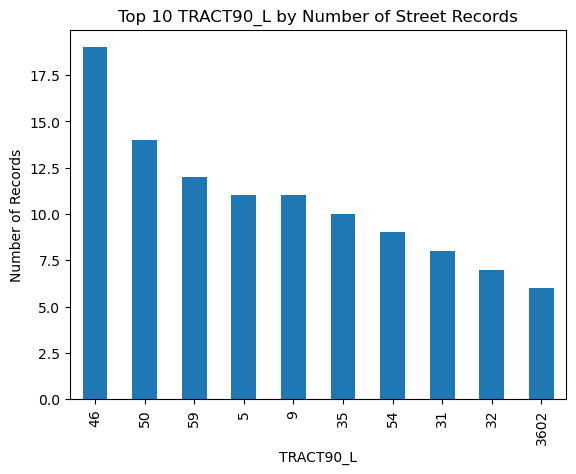

In [31]:
if len(geo_cols) == 0:
    print("No geographic columns found.")
else:
    geo_col = geo_cols[0]
    df[geo_col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 {geo_col} by Number of Street Records")
    plt.xlabel(geo_col)
    plt.ylabel("Number of Records")
    plt.show()


Key Findings from Exploratory Analysis

Finding 1: Street condition issues are unevenly distributed

The distribution of street condition–related numeric measures shows noticeable skewness rather than a uniform or normal distribution. This indicates that while many street segments fall within moderate condition ranges, a smaller subset of streets account for disproportionately poor conditions. This suggests that infrastructure challenges are concentrated in specific areas or segments, making targeted maintenance strategies more effective than uniform interventions.

Finding 2: Evidence of temporal variation in data records

Analysis of records aggregated by month reveals variation across the year, indicating seasonal patterns in reporting or maintenance activity. Certain months show higher volumes of records, while others show reduced activity. This pattern may reflect weather constraints, reporting delays, or seasonal maintenance cycles, and should be considered when interpreting trends or comparing street conditions over time.

Finding 3: Limited geographic granularity constrains neighborhood-level analysis

The dataset lacks explicit neighborhood or district identifiers, limiting the ability to directly assess infrastructure conditions at a neighborhood or ward level. As a result, geographic coverage must be inferred indirectly (e.g., via street-level attributes), which restricts conclusions about spatial equity. This limitation suggests caution when making claims about differential infrastructure quality across communities.

Finding 4: Data completeness and structure support descriptive analysis but not causal inference

While the dataset is sufficiently complete for descriptive statistics and exploratory visualization, missing values and inconsistent categorical formatting in some fields reduce its suitability for causal analysis. The data is well-suited for identifying patterns and generating hypotheses but requires supplementation with additional datasets (e.g., demographics or maintenance cost data) to support deeper policy conclusions.